# Unsupervised Lab Session

# Learning outcomes:

* Exploratory data analysis and data preparation for model building.
* PCA for dimensionality reduction.
* K-means and Agglomerative Clustering

# Problem Statement

Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

# Context:

* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
* Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# About dataset

* Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

# Attribute Information:

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# 1. Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from numpy.linalg import eig
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 2.Display a sample of five rows of the data frame

In [2]:
# 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.
df = pd.read_csv('/home/ds8/Downloads/lab-4-python/marketing.csv',encoding='unicode_escape')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* We have 2240 intances and 27 columns in the dataset.
* There are no missing values in the dataset.
* We have around 3 object type variables, 1 float type and rest all interger datatype variables.

# 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

*  INCOME has around 1.071 % missing values.

In [6]:
# filling the missing value in the Income 
df['Income'] = df['Income'].fillna(df['Income'].median())

In [7]:
# rechecking the missing values
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

* There are no missing values in the dataset now.

# 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])

0

* As we can see, There is no duplicate columns which is a good thing for us.

# 5. Drop the columns which you think redundant for the analysis

In [9]:
df = df.drop(columns=['ID','Dt_Customer'],axis=1)

In [10]:
# rechecking the dataset after dropping columns
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


# 6. Check the unique categories in the column 'Marital_Status'
* i) Group categories 'Married', 'Together' as 'relationship'
* ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'relationship')

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')

In [15]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [16]:
# rechecking after grouping categories
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

* Here we regrouped Married & Together as 'Relationship'.
* And Divorced, Widow, Alone ,YOLO & Absurd as 'Single'.
* Now there are only 2 unique categories in the column 'Marital_Status'

# 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'"

In [17]:
df['Total_Expenses']  = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses'],
      dtype='object')

# 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [19]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [20]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases'],
      dtype='object')

In [21]:
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

# 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [22]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [23]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases',
       'Kids'],
      dtype='object')

In [24]:
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

# 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [25]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [26]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

In [27]:
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

# 11. Drop those columns which we have used above for obtaining new features

In [28]:
# drpooing the columns as we have grouped them

col_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases', 'Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df=df.drop(columns=col_drop,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


# 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [29]:
df['Age'] = 2023 - df["Year_Birth"]

In [30]:
df=df.drop(columns=['Year_Birth'])

In [31]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42


# 13. Encode the categorical variables in the dataset

In [32]:
#Label encoding
cate=['Education','Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [33]:
cate

['Education', 'Marital_Status']

In [34]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,66
1,2,0,46344.0,38,5,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,422,19,1,0,42


# 14. Standardize the columns, so that values are in a particular range

In [35]:
# standardize the data
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df2 = pd.DataFrame(scaled_features,index=df1.index, columns=df1.columns)

In [36]:
scaled_features_df2.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235696,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235454,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773999,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022355,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241888,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


# 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [37]:
#Covariance Matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.12003272, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [-0.01375403,  1.00044663,  0.00468593, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [ 0.12003272,  0.00468593,  1.00044663, -0.0040626 , -0.55003054,
        -0.02719904,  0.66507176,  0.56370172, -0.29098745,  0.28723724,
         0.16097107],
       [-0.01173369, -0.00450972, -0.0040626 ,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882,  0.00344176, -0.55003054, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252, -0.00520466, -0.02719904,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [38]:
# Finding The eigen values & eigen vectors
eigenvalues, eigenvectors = eig(cov_matrix)
print('eigein vals:','\n',eigenvalues)
print('\n')
print('eigein vectors:','\n',eigenvectors)


eigein vals: 
 [3.1904976  0.15898427 0.33405275 1.2576053  0.57467313 0.70088133
 0.8148781  0.88268049 1.07559424 0.99819893 1.01686678]


eigein vectors: 
 [[-8.10840602e-02 -1.28350259e-02 -2.36686503e-02 -5.51297088e-01
   9.44079917e-02  1.09399823e-01  6.91176145e-01 -2.13936354e-01
   3.53448105e-01  1.33251310e-01  4.14253698e-02]
 [ 1.65906490e-02 -5.37729948e-04 -2.73537172e-03 -7.24644501e-02
   9.30748009e-03 -1.59677373e-01  9.75268782e-02 -2.48019835e-01
  -2.93280626e-01 -5.20531449e-01  7.35452612e-01]
 [-4.53903415e-01 -1.10154101e-01  7.33770178e-01 -1.11579420e-01
  -4.00829608e-01  2.33759772e-01 -3.55280357e-02  8.22772957e-02
  -7.11591328e-02 -3.28890469e-02  3.85228536e-02]
 [ 4.88801362e-03 -3.74741918e-02  1.77808800e-02 -1.12911590e-01
  -4.88512292e-02 -1.39140776e-01  2.76281232e-02 -4.78105566e-01
  -6.57509247e-01  5.43269886e-01 -8.33737576e-02]
 [ 3.78637324e-01  9.89967067e-02  5.23086432e-01 -3.88610332e-02
   4.48301055e-01  8.26478962e-02 -2.948866

In [39]:
# Scree plot
total = sum(eigenvalues)
var_exp = [(i/total)*100 for i in sorted(eigenvalues,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained variance:',var_exp)
print('\n')
print('Cummulative variance Explained :',cum_var_exp)

Explained variance: [28.991575143457833, 11.427671513170528, 9.77376419019718, 9.240116561433666, 9.07048456740163, 8.02078576624859, 7.4046755748476745, 6.36880396150948, 5.221968893580303, 3.035487484221481, 1.4446663439316332]


Cummulative variance Explained : [ 28.99157514  40.41924666  50.19301085  59.43312741  68.50361198
  76.52439774  83.92907332  90.29787728  95.51984617  98.55533366
 100.        ]


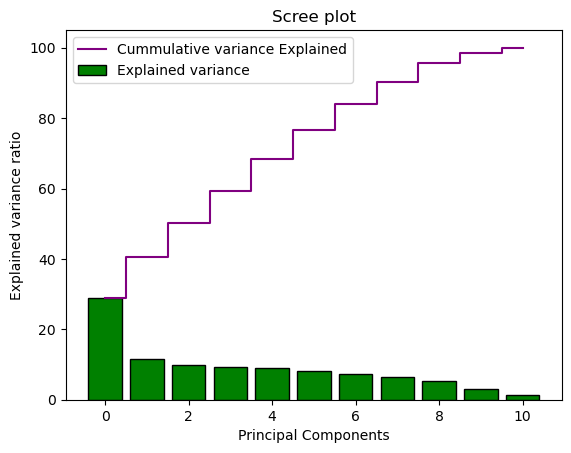

In [42]:
plt.bar(range(11),var_exp,align='center',color='green',edgecolor='black',label='Explained variance')
plt.step(range(11),cum_var_exp,where='mid',color='purple',label='Cummulative variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

# 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [44]:
#Using PCA transformed data for clustering
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df2),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414


In [45]:
#finding optimal k value by kmeans clustering using Elbow plot
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

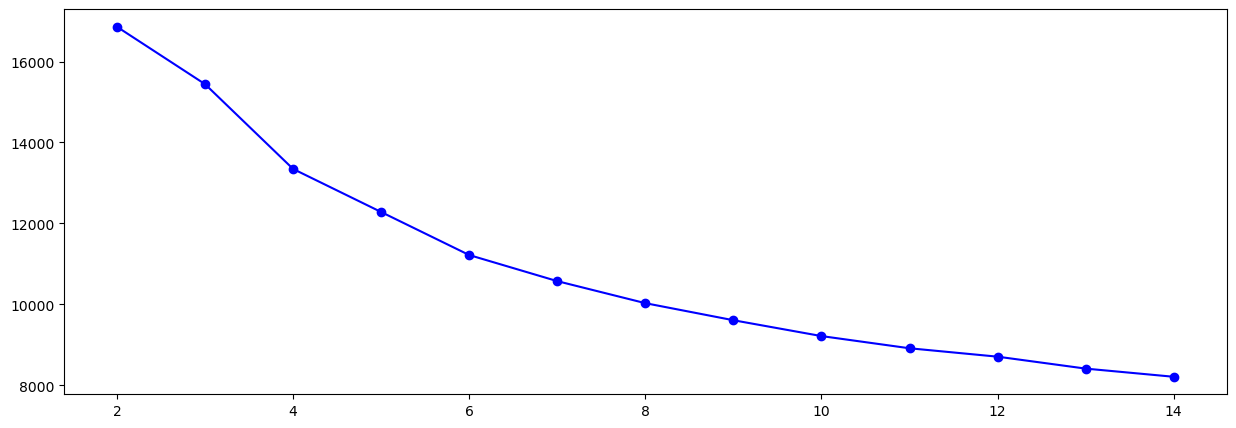

In [46]:
#creating dataframe of np. of clusters and clusters error
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

##Elbow Plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

* As there is decrease after cluster K=3, we can select the optimal cluster as K=3

In [47]:
##applyning kmeans clustering for optimal no.of clusters abtained above
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [48]:
##creating dataframes of the label
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [49]:
##joining label dataframe to pca_df dataframes
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545,0
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326,1
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777,0
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502,1
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414,2


In [50]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

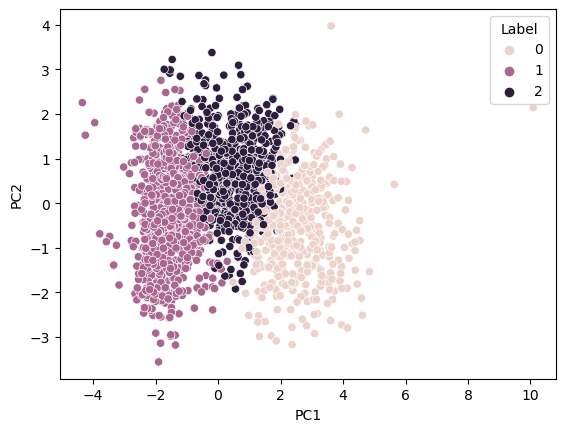

In [51]:
##visualizating the clusters formed
sns.scatterplot(data = kmeans_df, x=kmeans_df['PC1'],y = kmeans_df['PC2'], hue = 'Label')
plt.show()

# 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

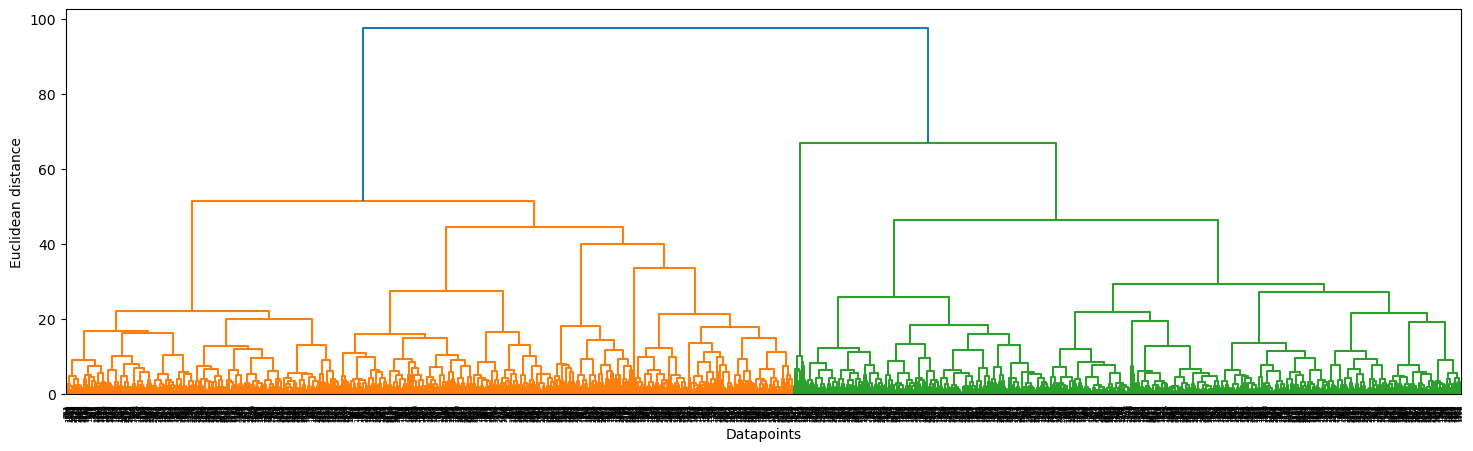

In [52]:
#Agglomerative clustering using original data
#from scipy.cluster.hierarchy import dendogram, linkage

plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram (merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [53]:
#computing silhouette score for Agglomerative clustering
from sklearn.metrics import silhouette_score

In [55]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df2)
    labels = hier.fit_predict(scaled_features_df2)
    print(i,silhouette_score(scaled_features_df2,labels))

2 0.19084804869283176
3 0.19859958241700815
4 0.11246117002815714
5 0.11424998800527261
6 0.1318222901111237
7 0.13957493415182012
8 0.13907565052967363
9 0.11337550304824405
10 0.11192620306559369
11 0.10382539580995384
12 0.10893573525800057
13 0.1023478558978143
14 0.09550766041984071


* we can see that the highest Silhoutte score is for cluster 3.
* lets choose K=3 as the optimal cluster size and build the agglomerative clustering modelusing original dataset.

In [57]:
#build the agglomerative clustering model using original dataset.
hie_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df2)

In [58]:
#creating dataframe of labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [59]:
#joining the label dataframe with the unscaled initial cleaned dataframe(dfc)

df_hier = df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,2,0,58138.0,58,7,0,1617,25,0,1,66,0
1,2,0,46344.0,38,5,0,27,6,2,0,69,1
2,2,1,71613.0,26,4,0,776,21,0,0,58,0
3,2,1,26646.0,26,6,0,53,8,1,0,39,1
4,4,1,58293.0,94,5,0,422,19,1,0,42,0


# Visualization and Interpretation of results

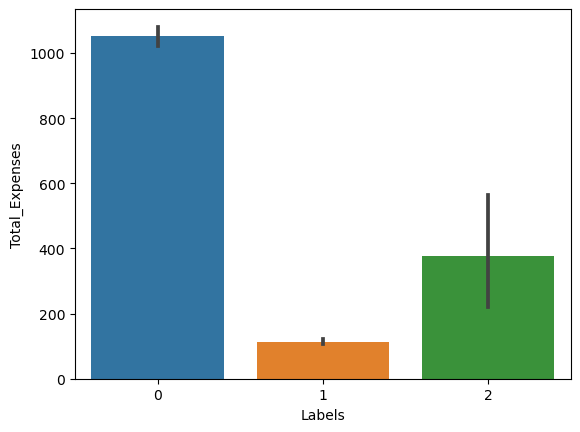

In [60]:
sns.barplot (x=df_hier['Labels'],y=df_hier['Total_Expenses'])
plt.show()

* Total expenses for cluster 0 are very much higher than cluster 1 & 2.

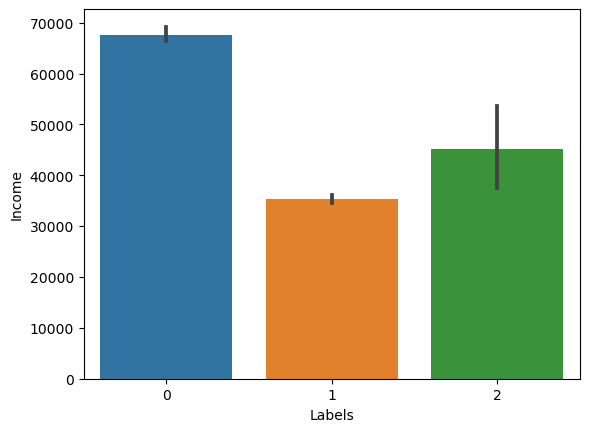

In [61]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Income'])
plt.show()

* The above plot shows that Income is also higher for Cluster 0 (that shows corelation with higher expenses.)

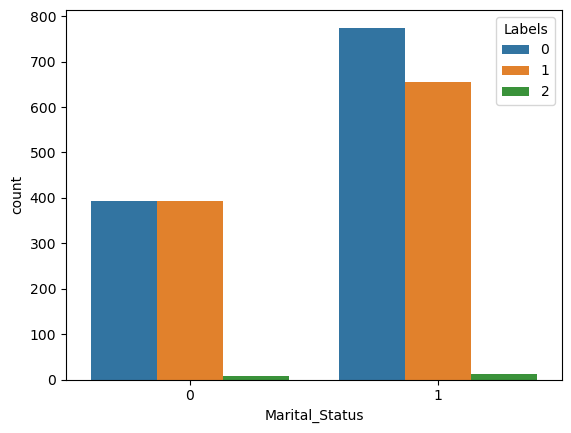

In [69]:
sns.countplot(x=df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

* Customers who are in relationship(Label-1) ( married or staying together) have more expenses compaired to single status(Label-0).
* means Customers in relationship falls under cluster 0 (Blue bar).

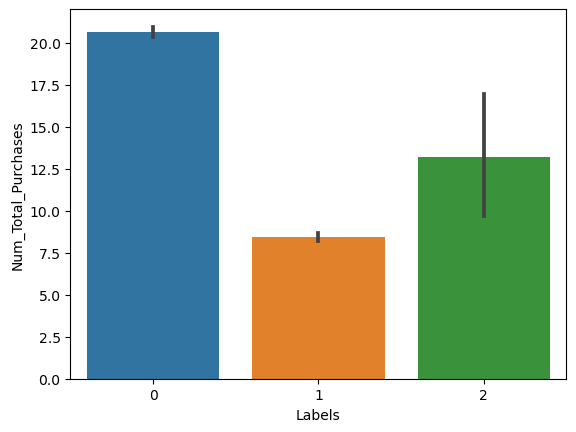

In [65]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Num_Total_Purchases'])
plt.show()

* Total number of purchases are also highest for Cluster 0 as compared to Cluster 1 & 2.

* In this case study, we have attempted to cluster the 'marketing datadataset'using K-means and agglomerative clustering.
* we reduced the dimensionality of the dataset using PCA.
* We came up with 3 clusters using K-means.
* Finally we visualized the data using various plots that shows our inferences are correct regarding total number of purchases, Income and Expenses.

## The End ..!